In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
# pip install cufflinks

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
#Data Import

In [6]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col = 0)

In [7]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [8]:
df.drop(labels =['Title', 'Clothing ID'], axis = 1, inplace = True)

In [9]:
df

Age                                        Review Text  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 8 columns]

In [10]:
df.isnull()

Age  Review Text  Rating  Recommended IND  Positive Feedback Count  \
0      False        False   False            False                    False   
1      False        False   False            False                    False   
2      False        False   False            False                    False   
3      False        False   False            False                    False   
4      False        False   False            False                    False   
...      ...          ...     ...              ...                      ...   
23481  False        False   False            False                    False   
23482  False        False   False            False                    False   
23483  False        False   False            False                    False   
23484  False        False   False            False                    False   
23485  False        False   False            False                    False   

       Division Name  Department Name  Class Name  
0              False            False       False  
1              False            False       False  
2              False            False       False  
3              False            False       False  
4              False            False       False  
...              ...              ...         ...  
23481          False            False       False  
23482          False            False       False  
23483          False            False       False  
23484          False            False       False  
23485          False            False       False  

[23486 rows x 8 columns]

In [11]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [12]:
df.dropna(subset=['Review Text', 'Division Name'], inplace = True)

In [13]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [14]:
# ' '.join(df['Review Text'].tolist())

In [15]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [16]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [17]:
x = "i don't know what date is today, I am 5'8\""

In [18]:
print(cont_to_exp(x))

i do not know what date is today, I am 5'8"


In [19]:
%%time
df['Review Text'] = df['Review Text'].apply(lambda x: cont_to_exp(x))

CPU times: total: 750 ms
Wall time: 749 ms


In [20]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [21]:
print(' '.join(df['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt i

In [22]:
#feature engineering

In [23]:
from textblob import TextBlob

In [24]:
# TextBlob("you are not good").sentiment.polarity

In [25]:
df['polarity'] = df['Review Text'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [26]:
df['Review_len'] = df['Review Text'].apply(lambda x : len(x))

In [27]:
df['word_count'] = df['Review Text'].apply(lambda x : len(x.split()))

In [28]:
def get_avg_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word) 
    return word_len/(len(words))

In [29]:
get_avg_len("My name is this this this")

3.3333333333333335

In [30]:
df['avg_word_len'] = df['Review Text'].apply(lambda x : get_avg_len(x))

In [31]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  Review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         125          23      4.478261  
4    Blouses  0.512891         192          36      4.361111

In [32]:
df['polarity'].iplot()

In [33]:
df['polarity'].iplot(kind = 'hist', colors = 'red', bins = 100, xTitle = 'Polarity', yTitle = 'Count', title = 'Sentiment Polarity Distribution')

In [34]:
#Distribution of Reviews Rating

In [35]:
df['Rating'].iplot(kind = 'hist', xTitle = 'Rating', yTitle = 'Count', title = 'Review Rating Distribution')

In [36]:
df['Age'].iplot(kind = 'hist', bins = 40, xTitle = 'Age', yTitle = 'Count', title = 'Reviewers Age Distribution', linecolor = 'red')

In [37]:
#distri on review text len

In [38]:
df['Review_len'].iplot(kind = 'hist', xTitle = 'Review Len', yTitle = 'Count', title = 'Word Len Distribution')

In [39]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Len', yTitle = 'Count', title = 'Word Len Distribution')

In [40]:
df['avg_word_len'].iplot(kind = 'hist', xTitle = 'Word Len', yTitle = 'Count', title = 'Word Len Distribution')

In [41]:
df['avg_word_len'].iplot(kind = 'hist', xTitle = 'Word Len', yTitle = 'Count', title = 'Word Len Distribution')

In [42]:
#Distribution of Department, Division and class

In [43]:
df.head(1)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   

  Class Name  polarity  Review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8          5.75

In [44]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [45]:
df.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3662         3662    3662             3662   
Dresses           6145         6145    6145             6145   
Intimate          1653         1653    1653             1653   
Jackets           1002         1002    1002             1002   
Tops             10048        10048   10048            10048   
Trend              118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  polarity  \
Department Name                                                                 
Bottoms                             3662           3662        3662      3662   
Dresses                             6145           6145        6145      6145   
Intimate                            1653           1653        1653      1653   
Jackets                             1002           1002        1002      1002   
Tops                               10048          10048       10048     10048   
Trend                                118            118         118       118   

                 Review_len  word_count  avg_word_len  
Department Name                                        
Bottoms                3662        3662          3662  
Dresses                6145        6145          6145  
Intimate               1653        1653          1653  
Jackets                1002        1002          1002  
Tops                  10048       10048         10048  
Trend                   118         118           118

In [46]:
df.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3662         3662    3662             3662   
Dresses           6145         6145    6145             6145   
Intimate          1653         1653    1653             1653   
Jackets           1002         1002    1002             1002   
Tops             10048        10048   10048            10048   
Trend              118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  polarity  \
Department Name                                                                 
Bottoms                             3662           3662        3662      3662   
Dresses                             6145           6145        6145      6145   
Intimate                            1653           1653        1653      1653   
Jackets                             1002           1002        1002      1002   
Tops                               10048          10048       10048     10048   
Trend                                118            118         118       118   

                 Review_len  word_count  avg_word_len  
Department Name                                        
Bottoms                3662        3662          3662  
Dresses                6145        6145          6145  
Intimate               1653        1653          1653  
Jackets                1002        1002          1002  
Tops                  10048       10048         10048  
Trend                   118         118           118

In [47]:
df['Department Name'].value_counts().iplot()

In [48]:
df['Department Name'].value_counts().iplot(kind = 'bar', xTitle ='Depatment', yTitle = 'count')

In [49]:
#same can be done with class name and division name

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
x = ['this is the list list this']

In [52]:
vec = CountVectorizer().fit(x)
vec

CountVectorizer()

In [53]:
bow = vec.transform(x)
bow

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [54]:
sum_words = bow.sum(axis = 0)
sum_words

matrix([[1, 2, 1, 2]], dtype=int64)

In [55]:
vec.vocabulary_.items()

dict_items([('this', 3), ('is', 0), ('the', 2), ('list', 1)])

In [56]:
x

['this is the list list this']

In [57]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
words_freq

[('this', 2), ('list', 2), ('is', 1), ('the', 1)]

In [58]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]

In [59]:
get_top_n_words(x, 3)

[('this', 2), ('list', 2), ('is', 1)]

In [60]:
words = get_top_n_words(df['Review Text'], 20)

In [61]:
words

[('the', 76159),
 ('it', 49273),
 ('and', 48993),
 ('is', 38103),
 ('this', 25758),
 ('to', 24577),
 ('in', 20722),
 ('not', 16631),
 ('but', 16549),
 ('on', 15325),
 ('for', 13994),
 ('of', 13428),
 ('was', 12923),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11027),
 ('dress', 10567),
 ('that', 10011),
 ('have', 9077)]

In [62]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [63]:
# x = ['this is shravya bhavaraju']
# unigram = this, is, shravya, bhavaraju
# bigram = this is, is shravya, shravya bhavaraju
# trigram = this is shravya, is shravya bhavaraju

In [64]:
df1

Unigrams  Frequency
0       the      76159
1        it      49273
2       and      48993
3        is      38103
4      this      25758
5        to      24577
6        in      20722
7       not      16631
8       but      16549
9        on      15325
10      for      13994
11       of      13428
12      was      12923
13     with      12797
14       so      12017
15       am      11174
16       my      11027
17    dress      10567
18     that      10011
19     have       9077

In [65]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 words')

# Bigram

In [66]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    

In [67]:
get_top_n_words(x, 3)

[('this is', 1), ('is the', 1), ('the list', 1)]

In [68]:
words = get_top_n_words(df['Review Text'], 20)

In [69]:
words

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5611),
 ('this dress', 4758),
 ('on the', 4337),
 ('of the', 3933),
 ('and it', 3723),
 ('it was', 3287),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2655),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117)]

In [70]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [71]:
df1

Unigrams  Frequency
0        it is      12525
1       in the       7169
2      and the       5611
3   this dress       4758
4       on the       4337
5       of the       3933
6       and it       3723
7       it was       3287
8     this top       2939
9      this is       2772
10     is very       2729
11  the fabric       2655
12    love the       2641
13     did not       2486
14   love this       2331
15     to wear       2266
16      but it       2196
17   the dress       2180
18      is not       2130
19      do not       2117

In [72]:
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 words')

## Trigram

In [73]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    

In [74]:
get_top_n_words(x, 3)

[('this is the', 1), ('is the list', 1), ('the list list', 1)]

In [75]:
words = get_top_n_words(df['Review Text'], 20)

In [76]:
words

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 550),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518)]

In [77]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [78]:
df1

Unigrams  Frequency
0      true to size       1316
1     the fabric is       1301
2         and it is       1124
3     this dress is       1123
4        it is very        976
5         but it is        921
6         it is not        910
7   the material is        896
8      in the store        728
9      on the model        725
10       the fit is        696
11      this top is        672
12     the color is        630
13  love this dress        605
14         it is so        584
15      tried it on        574
16       and it was        550
17      in the back        528
18     the dress is        518
19       up or down        518

In [79]:
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 words')

In [80]:
# Distribution of unigrams, bigrams and trigrams without stop words

In [81]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    

In [82]:
get_top_n_words(x, 3)

[('list', 2)]

In [83]:
words = get_top_n_words(df['Review Text'], 20)

In [84]:
words

[('dress', 10567),
 ('love', 8945),
 ('size', 8770),
 ('fit', 7322),
 ('like', 7148),
 ('wear', 6434),
 ('great', 6114),
 ('just', 5604),
 ('fabric', 4797),
 ('small', 4726),
 ('color', 4604),
 ('look', 4039),
 ('really', 3924),
 ('ordered', 3850),
 ('little', 3773),
 ('perfect', 3772),
 ('flattering', 3519),
 ('did', 3447),
 ('soft', 3336),
 ('comfortable', 3058)]

In [85]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [86]:
df1

Unigrams  Frequency
0         dress      10567
1          love       8945
2          size       8770
3           fit       7322
4          like       7148
5          wear       6434
6         great       6114
7          just       5604
8        fabric       4797
9         small       4726
10        color       4604
11         look       4039
12       really       3924
13      ordered       3850
14       little       3773
15      perfect       3772
16   flattering       3519
17          did       3447
18         soft       3336
19  comfortable       3058

In [87]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 words')

In [88]:
### BIIIIIGRAMMMMMM

In [89]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    

In [90]:
get_top_n_words(x, 3)

[('list list', 1)]

In [91]:
words = get_top_n_words(df['Review Text'], 20)

In [92]:
words

[('true size', 1347),
 ('love dress', 766),
 ('usually wear', 694),
 ('looks great', 620),
 ('fit perfectly', 609),
 ('size small', 540),
 ('fits perfectly', 489),
 ('usual size', 479),
 ('just right', 434),
 ('look like', 426),
 ('ordered size', 375),
 ('love love', 374),
 ('looks like', 373),
 ('runs large', 367),
 ('super cute', 363),
 ('highly recommend', 363),
 ('wear size', 361),
 ('fabric soft', 356),
 ('feel like', 349),
 ('fit great', 348)]

In [93]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [94]:
df1

Unigrams  Frequency
0          true size       1347
1         love dress        766
2       usually wear        694
3        looks great        620
4      fit perfectly        609
5         size small        540
6     fits perfectly        489
7         usual size        479
8         just right        434
9          look like        426
10      ordered size        375
11         love love        374
12        looks like        373
13        runs large        367
14        super cute        363
15  highly recommend        363
16         wear size        361
17       fabric soft        356
18         feel like        349
19         fit great        348

In [97]:
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')


In [95]:
df1

Unigrams  Frequency
0          true size       1347
1         love dress        766
2       usually wear        694
3        looks great        620
4      fit perfectly        609
5         size small        540
6     fits perfectly        489
7         usual size        479
8         just right        434
9          look like        426
10      ordered size        375
11         love love        374
12        looks like        373
13        runs large        367
14        super cute        363
15  highly recommend        363
16         wear size        361
17       fabric soft        356
18         feel like        349
19         fit great        348

In [96]:
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 words')

In [ ]:
#Trigram

In [98]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]
    

In [99]:
# get_top_n_words(x, 3)

In [100]:
words = get_top_n_words(df['Review Text'], 20)

In [101]:
words

[('fits true size', 280),
 ('fit true size', 229),
 ('runs true size', 148),
 ('love love love', 143),
 ('usually wear size', 136),
 ('ordered usual size', 107),
 ('does run large', 96),
 ('really wanted love', 94),
 ('wanted love dress', 88),
 ('usually wear small', 80),
 ('small fit perfectly', 77),
 ('just did work', 71),
 ('looks great jeans', 70),
 ('fit like glove', 69),
 ('usually wear medium', 68),
 ('normally wear size', 68),
 ('small fits perfectly', 65),
 ('size fit perfectly', 65),
 ('fits like glove', 65),
 ('usual size small', 64)]

In [102]:
df1 = pd.DataFrame(words, columns = ['Unigrams', 'Frequency'])

In [103]:
df1

Unigrams  Frequency
0         fits true size        280
1          fit true size        229
2         runs true size        148
3         love love love        143
4      usually wear size        136
5     ordered usual size        107
6         does run large         96
7     really wanted love         94
8      wanted love dress         88
9     usually wear small         80
10   small fit perfectly         77
11         just did work         71
12     looks great jeans         70
13        fit like glove         69
14   usually wear medium         68
15    normally wear size         68
16  small fits perfectly         65
17    size fit perfectly         65
18       fits like glove         65
19      usual size small         64

In [104]:
df1 = pd.DataFrame(words, columns = ['Trigarm', 'Frequency'])
df1 = df1.set_index('Trigarm')


In [105]:
df1

Frequency
Trigarm                        
fits true size              280
fit true size               229
runs true size              148
love love love              143
usually wear size           136
ordered usual size          107
does run large               96
really wanted love           94
wanted love dress            88
usually wear small           80
small fit perfectly          77
just did work                71
looks great jeans            70
fit like glove               69
usually wear medium          68
normally wear size           68
small fits perfectly         65
size fit perfectly           65
fits like glove              65
usual size small             64

In [106]:
df1.iplot(kind = 'bar', xTitle = 'Trigarm', yTitle = 'Count', title = 'Top 20 words')

In [ ]:
# Distri of top 20 pos

In [107]:
import nltk

In [108]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [109]:
blob = TextBlob(str(df['Review Text']))

In [110]:
blob

TextBlob("0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object")

In [111]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\omen\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [112]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [113]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'NN'),
 ('happen', 'VBP'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('fun', 'JJ'),
 ('f', 'JJ'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('dr

In [114]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])

In [115]:
pos_df

words  pos
0             0   CD
1    Absolutely   RB
2     wonderful   JJ
3         silky   NN
4           and   CC
..          ...  ...
106        Text  NNP
107      Length  NNP
108       22628   CD
109       dtype   NN
110      object   NN

[111 rows x 2 columns]

In [116]:
pos_df = pos_df['pos'].value_counts()

In [117]:
pos_df

NN     23
DT     15
JJ     13
CD     11
PRP     8
RB      6
VBZ     5
VBP     5
IN      5
CC      4
NNP     4
VBD     4
TO      3
NNS     2
VB      2
PDT     1
Name: pos, dtype: int64

In [118]:
pos_df.iplot(kind = 'bar')

In [119]:
### Bivarate Analysis

In [120]:
df.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  polarity  Review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154

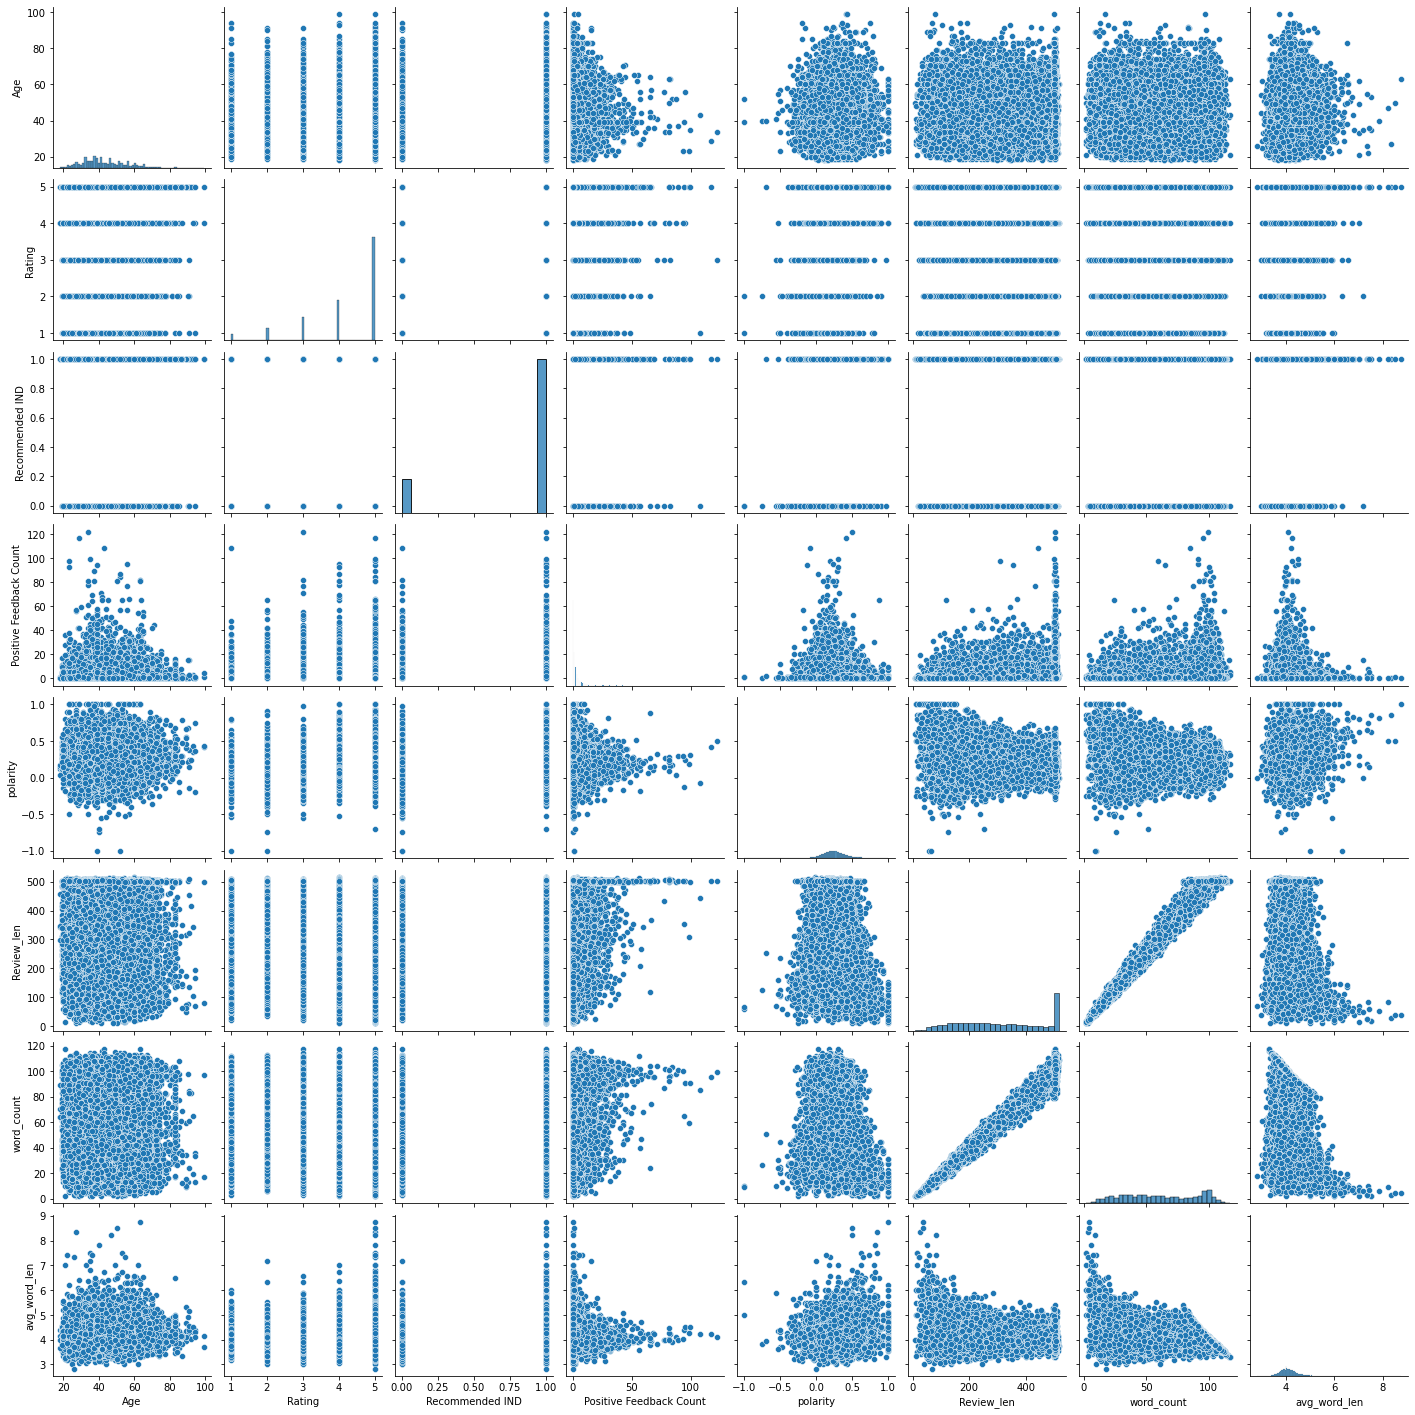

In [121]:
sns.pairplot(df)

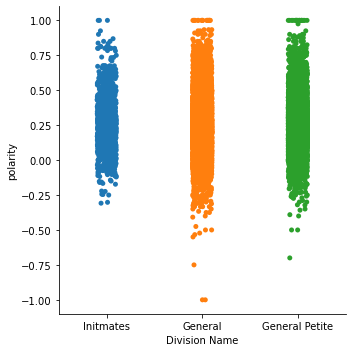

In [122]:
sns.catplot(x = 'Division Name', y = 'polarity', data = df)

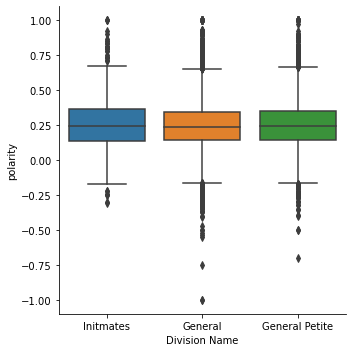

In [123]:
sns.catplot(kind = 'box', x = 'Division Name', y = 'polarity', data = df)

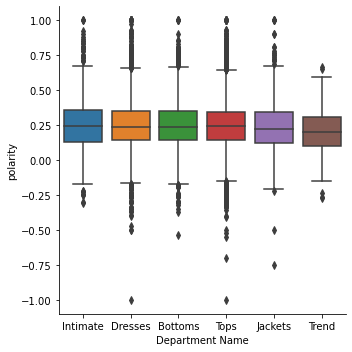

In [124]:
sns.catplot(kind = 'box', x = 'Department Name', y = 'polarity', data = df)

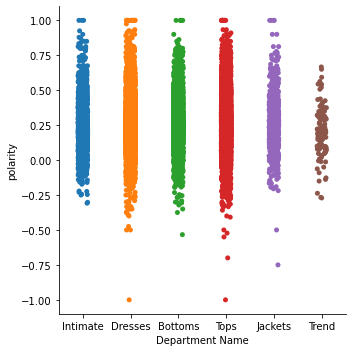

In [125]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df)

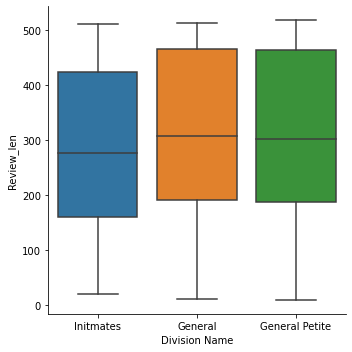

In [126]:
sns.catplot(x = 'Division Name', y = 'Review_len', data = df, kind = 'box')

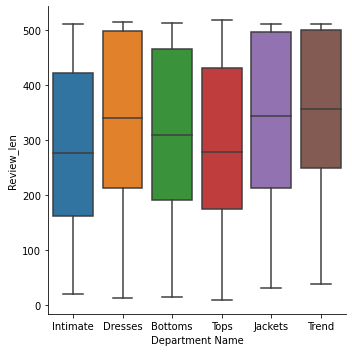

In [127]:
sns.catplot(x = 'Department Name', y = 'Review_len', data = df, kind = 'box')

In [128]:
### Distribution of Ratings Based on recommendation IND

In [129]:
import plotly.express as px
import plotly.graph_objects as go

In [130]:
x1 = df[df['Recommended IND'] == 1]
x1

Age                                        Review Text  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it is sooo pretty.  i happen...       5   
3       50  I love, love, love this jumpsuit. it is fun, f...       5   
4       47  This shirt is very flattering to all due to th...       5   
6       39  I aded this in my basket at hte last mintue to...       5   
...    ...                                                ...     ...   
23479   42  So i was not sure about ordering this skirt be...       5   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
3                    1                        0  General Petite   
4                    1                        6         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23479                1                        0  General Petite   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  polarity  Review_len  word_count  \
0            Intimate  Intimates  0.633333          53           8   
1             Dresses    Dresses  0.339583         306          65   
3             Bottoms      Pants  0.550000         125          23   
4                Tops    Blouses  0.512891         192          36   
6                Tops      Knits  0.133750         496         101   
...               ...        ...       ...         ...         ...   
23479         Bottoms     Skirts  0.153443         505         102   
23481         Dresses    Dresses  0.552667         132          29   
23482            Tops      Knits  0.091667         223          38   
23484         Dresses    Dresses  0.155556         429          88   
23485         Dresses    Dresses  0.413889         110          19   

       avg_word_len  
0          5.750000  
1          3.646154  
3          4.478261  
4          4.361111  
6          3.920792  
...             ...  
23479      3.960784  
23481      3.586207  
23482      4.894737  
23484      3.886364  
23485      4.842105  

[18527 rows x 12 columns]

In [131]:
x1 = df[df['Recommended IND'] == 1]['Rating']
x1

0        4
1        5
3        5
4        5
6        5
        ..
23479    5
23481    5
23482    3
23484    3
23485    5
Name: Rating, Length: 18527, dtype: int64

In [132]:
x0 = df[df['Recommended IND'] == 0]['Rating']
x0

2        3
5        2
10       3
22       2
25       3
        ..
23449    3
23450    3
23460    3
23478    1
23483    3
Name: Rating, Length: 4101, dtype: int64

In [133]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [134]:
data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distri based on the Sentiment Polarity of Rating')
fig = go.Figure(data = data, layout = layout)
fig.show()
# iplot(fig) #

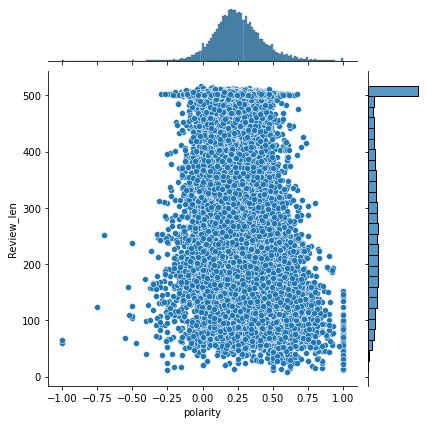

In [135]:
sns.jointplot(x = 'polarity', y = 'Review_len', data = df)

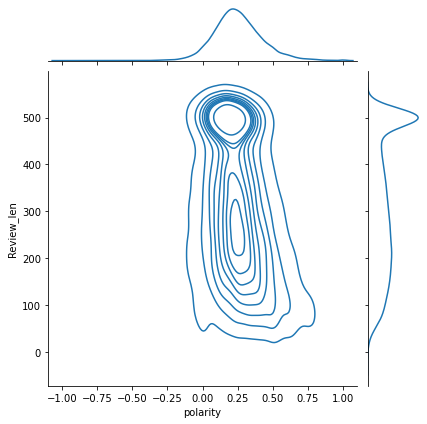

In [136]:
sns.jointplot(kind = 'kde',x = 'polarity', y = 'Review_len', data = df)

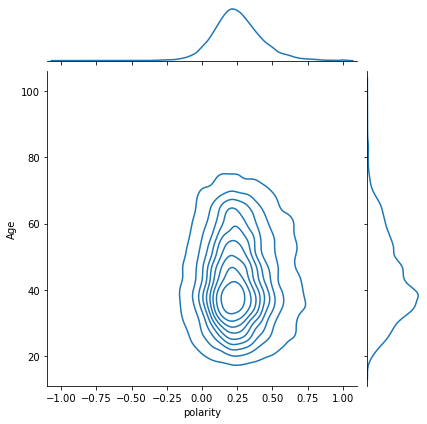

In [137]:
sns.jointplot(kind = 'kde',x = 'polarity', y = 'Age', data = df)

In [138]:
### Distribution of Ratings Based on recommendation

In [139]:
x1 = df[df['Recommended IND'] == 1]
x1

Age                                        Review Text  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it is sooo pretty.  i happen...       5   
3       50  I love, love, love this jumpsuit. it is fun, f...       5   
4       47  This shirt is very flattering to all due to th...       5   
6       39  I aded this in my basket at hte last mintue to...       5   
...    ...                                                ...     ...   
23479   42  So i was not sure about ordering this skirt be...       5   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
3                    1                        0  General Petite   
4                    1                        6         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23479                1                        0  General Petite   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  polarity  Review_len  word_count  \
0            Intimate  Intimates  0.633333          53           8   
1             Dresses    Dresses  0.339583         306          65   
3             Bottoms      Pants  0.550000         125          23   
4                Tops    Blouses  0.512891         192          36   
6                Tops      Knits  0.133750         496         101   
...               ...        ...       ...         ...         ...   
23479         Bottoms     Skirts  0.153443         505         102   
23481         Dresses    Dresses  0.552667         132          29   
23482            Tops      Knits  0.091667         223          38   
23484         Dresses    Dresses  0.155556         429          88   
23485         Dresses    Dresses  0.413889         110          19   

       avg_word_len  
0          5.750000  
1          3.646154  
3          4.478261  
4          4.361111  
6          3.920792  
...             ...  
23479      3.960784  
23481      3.586207  
23482      4.894737  
23484      3.886364  
23485      4.842105  

[18527 rows x 12 columns]

In [140]:
x1 = df[df['Recommended IND'] == 1]['polarity']
x1

0        0.633333
1        0.339583
3        0.550000
4        0.512891
6        0.133750
           ...   
23479    0.153443
23481    0.552667
23482    0.091667
23484    0.155556
23485    0.413889
Name: polarity, Length: 18527, dtype: float64

In [141]:
x0 = df[df['Recommended IND'] == 0]['polarity']
x0

2        0.073675
5        0.178750
10       0.015707
22      -0.045595
25       0.261508
           ...   
23449   -0.039583
23450    0.215368
23460    0.100370
23478   -0.078788
23483    0.414286
Name: polarity, Length: 4101, dtype: float64

In [142]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [143]:
data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distri based on the Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)
fig.show()
# iplot(fig) #